In [76]:
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

In [77]:
# load the audio file.
x, sr = librosa.load('white_noise.wav', sr=44100)

ipd.Audio(x, rate=sr)

In [78]:
# define bi-quad EQ filter.
def biquad(x, fc, fs, G, Q):
    # x: input sequence
    # fc: cut-off frequency
    # fs: sampling rate
    # G: gain in dB
    # Q: resonance in dB
    
    Q = np.power(10, Q/20)
    G = np.sqrt(np.power(10, G/20))
    
    w0  = 2*np.pi*fc/fs
    alpha = np.sin(w0)/2/Q
    
    b0 = 1+alpha*G
    b1 = -2*np.cos(w0)
    b2 = 1-alpha*G
    
    a0 = 1+alpha/G
    a1 = -2*np.cos(w0)
    a2 = 1-alpha/G
    
    B = [b0, b1, b2]
    A = [a0, a1, a2]
    
    xz1 = 0
    xz2 = 0
    yz1 = 0
    yz2 = 0
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = (b0*x[i]+b1*xz1+b2*xz2-a1*yz1-a2*yz2)/a0
        xz2 = xz1
        xz1 = x[i]
        yz2 = yz1
        yz1 = y[i]
    
    return y

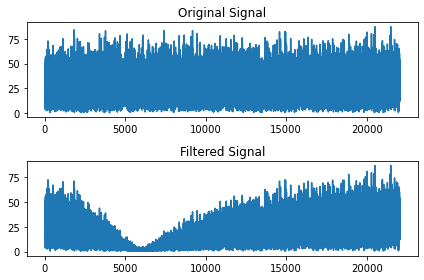

In [79]:
# check out the output of bi-quad EQ with various input parameters.
fc = 6000
G = -24
Q = 6

y = biquad(x, fc, sr, G, Q)

# visulize spectrums of original/filtered signal
plt.subplot(211)
plt.title('Original Signal')
plt.plot(np.abs(np.fft.rfft(x)))
plt.subplot(212)
plt.title('Filtered Signal')
plt.plot(np.abs(np.fft.rfft(y)))
plt.tight_layout()
plt.show()

# play filtered signal
ipd.Audio(y, rate=sr)